## NAME: ABHISHEK SRIVASTAVA
## TYBTECH   ECE (AI) 

<b>TOPIC</b>: HUMAN ACTIVITY RECOGNITION 

### PART-1

#### Importing and Data processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import warnings
warnings.simplefilter("ignore")

# for bokeh plotting
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.io import output_file
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin

# for chi-square
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import scipy.stats

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# for deep learning
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
warnings.simplefilter("ignore")
from hyperas.distributions import choice, uniform
warnings.simplefilter("ignore")

####  Features

In [2]:
fea=list()
with open('features.txt') as f:
    for i in f:
        fea.append(i.split()[1])
l=pd.DataFrame(fea)
print(l)

                                       0
0                      tBodyAcc-mean()-X
1                      tBodyAcc-mean()-Y
2                      tBodyAcc-mean()-Z
3                       tBodyAcc-std()-X
4                       tBodyAcc-std()-Y
..                                   ...
556      angle(tBodyGyroMeangravityMean)
557  angle(tBodyGyroJerkMeangravityMean)
558                  angle(XgravityMean)
559                  angle(YgravityMean)
560                  angle(zgravityMean)

[561 rows x 1 columns]


#### Train data

In [3]:
train_df=pd.read_csv("X_train.txt",delim_whitespace=",")
train_df1=pd.read_csv("y_train.txt")

# dealing with missing data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(train_df[::])
train_df[::]=imputer.transform(train_df[:])

# changing column name
train_df.columns=l[0]
train_df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),angle(tBodyAccMeangravity),angle(tBodyAccJerkMean)gravityMean),angle(tBodyGyroMeangravityMean),angle(tBodyGyroJerkMeangravityMean),angle(XgravityMean),angle(YgravityMean),angle(zgravityMean)
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


NOTE:- There are total 561 features so we need to select features out of them based on importance for better 
        understanding of data.

##### Extracting important features.

In [4]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(train_df,train_df1)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00921
Feature: 1, Score: -0.03097
Feature: 2, Score: 0.00704
Feature: 3, Score: -0.33836
Feature: 4, Score: 0.25741
Feature: 5, Score: 0.06385
Feature: 6, Score: -0.24955
Feature: 7, Score: 0.23556
Feature: 8, Score: 0.00297
Feature: 9, Score: -0.38314
Feature: 10, Score: 0.09887
Feature: 11, Score: -0.07683
Feature: 12, Score: 0.12450
Feature: 13, Score: -0.00458
Feature: 14, Score: -0.04195
Feature: 15, Score: -0.07447
Feature: 16, Score: -0.31843
Feature: 17, Score: -0.00452
Feature: 18, Score: -0.03980
Feature: 19, Score: -0.07733
Feature: 20, Score: 0.07482
Feature: 21, Score: -0.16036
Feature: 22, Score: 0.42977
Feature: 23, Score: -0.03540
Feature: 24, Score: -0.01223
Feature: 25, Score: -0.19136
Feature: 26, Score: 0.27720
Feature: 27, Score: 0.12126
Feature: 28, Score: -0.28997
Feature: 29, Score: -0.02826
Feature: 30, Score: 0.06827
Feature: 31, Score: -0.05433
Feature: 32, Score: 0.14700
Feature: 33, Score: 0.05484
Feature: 34, Score: 0.09341
Feature: 35

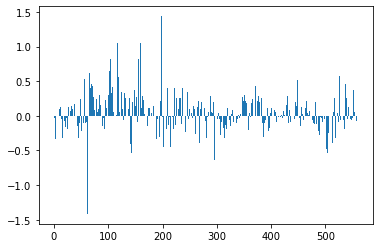

In [5]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [6]:
# creating columns in train data
activity=pd.read_csv("y_train.txt", squeeze=True)
train_df['activity']=activity
train_df['subject_id']=pd.read_csv("subject_train.txt")
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
train_df["activity_name"] = label_name
print(train_df[train_df.columns[-3:]])

0     activity  subject_id     activity_name
0            5           1          STANDING
1            5           1          STANDING
2            5           1          STANDING
3            5           1          STANDING
4            5           1          STANDING
...        ...         ...               ...
7346         2          30  WALKING_UPSTAIRS
7347         2          30  WALKING_UPSTAIRS
7348         2          30  WALKING_UPSTAIRS
7349         2          30  WALKING_UPSTAIRS
7350         2          30  WALKING_UPSTAIRS

[7351 rows x 3 columns]


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Columns: 564 entries, tBodyAcc-mean()-X to activity_name
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


#### Test data

In [8]:
# reading test data
test_df=pd.read_csv('X_test.txt',delim_whitespace=" ")
test_df1=pd.read_csv('y_test.txt')

# dealing with missing data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(test_df[::])
test_df[::]=imputer.transform(test_df[:])

# changing column name
test_df.columns=l[0]
test_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),angle(tBodyAccMeangravity),angle(tBodyAccJerkMean)gravityMean),angle(tBodyGyroMeangravityMean),angle(tBodyGyroJerkMeangravityMean),angle(XgravityMean),angle(YgravityMean),angle(zgravityMean)
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2942,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2943,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2944,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [9]:
# creating columns
activity=pd.read_csv("y_test.txt",squeeze=True)
test_df['activity']=activity
test_df['subject_id']=pd.read_csv("subject_train.txt")
label=activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
test_df["activity_name"] = label
print(test_df[test_df.columns[-3:]])

0     activity  subject_id     activity_name
0            5           1          STANDING
1            5           1          STANDING
2            5           1          STANDING
3            5           1          STANDING
4            5           1          STANDING
...        ...         ...               ...
2941         2          16  WALKING_UPSTAIRS
2942         2          16  WALKING_UPSTAIRS
2943         2          16  WALKING_UPSTAIRS
2944         2          16  WALKING_UPSTAIRS
2945         2          16  WALKING_UPSTAIRS

[2946 rows x 3 columns]


In [10]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Columns: 564 entries, tBodyAcc-mean()-X to activity_name
dtypes: float64(561), int64(2), object(1)
memory usage: 12.7+ MB
None


In [11]:
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


In [12]:
train_df['activity_name'].value_counts()

LYING                 1407
STANDING              1373
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: activity_name, dtype: int64

In [13]:
test_df['activity_name'].value_counts()

LYING                 537
STANDING              531
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: activity_name, dtype: int64

### PART-2 (EDA)

#### Dependent variables

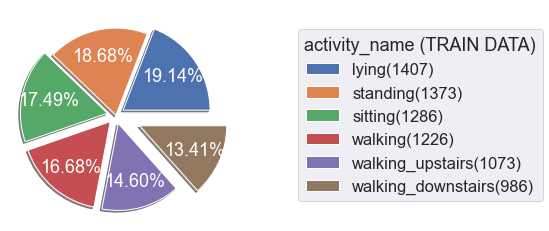

<AxesSubplot:xlabel='count', ylabel='activity_name'>

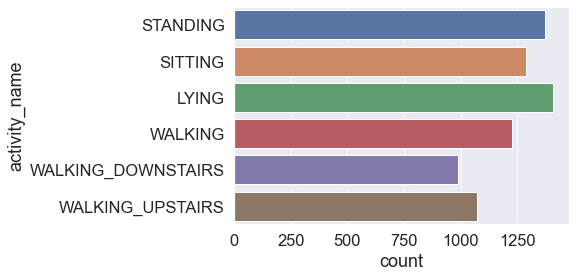

In [51]:
# parameters
activity_name = ["1407 lying(1407)","1373 standing(1373)","1286 sitting(1286)","1226 walking(1226)",
                 "1073 walking_upstairs(1073)","986 walking_downstairs(986)"]

# accessing elements
data = [float(x.split()[0]) for x in activity_name]
type= [x.split()[-1] for x in activity_name]

# creating plot
plt.pie(data, autopct='%1.2f%%',pctdistance=0.69, textprops=dict(color="w"),
        shadow=True,explode=(0.1,0.0,0.1,0.1,0.1,0.3))

#adding legend
plt.legend(type,
          title="activity_name (TRAIN DATA)",
          loc="right", bbox_to_anchor=(2, 0, 0.5, 1))


#showing plot
plt.show()
# count plot
sns.countplot(y='activity_name', data=train_df)

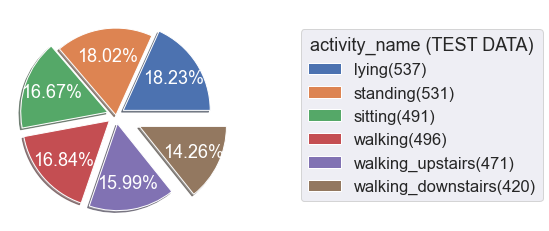

<AxesSubplot:xlabel='count', ylabel='activity_name'>

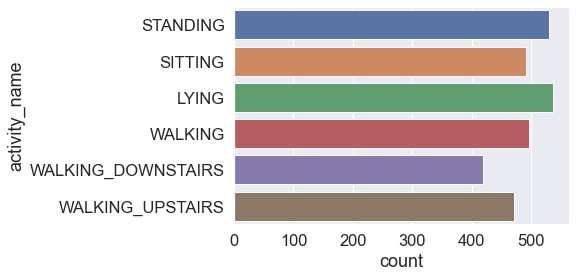

In [52]:
# parameters
activity_name = ["537 lying(537)","531 standing(531)","491 sitting(491)",
                 "496 walking(496)","471 walking_upstairs(471)",
                 "420 walking_downstairs(420)"]

# accessing elements
data = [float(x.split()[0]) for x in activity_name]
type= [x.split()[-1] for x in activity_name]

# creating plot
plt.pie(data, autopct='%1.2f%%',pctdistance=0.69, textprops=dict(color="w"),
        shadow=True,explode=(0.1,0.0,0.1,0.1,0.1,0.3))

#adding legend
plt.legend(type,
          title="activity_name (TEST DATA)",
          loc="right", bbox_to_anchor=(2, 0, 0.5, 1))


#showing plot
plt.show()
# count plot
sns.countplot(y='activity_name', data=test_df)

#### Indepedent variable

In [53]:
# tBodyAccMag-mean() vs angle(XgravityMean)
x=train_df['tBodyAccMag-mean()']
y=train_df['angle(XgravityMean)']
output_notebook()

p=figure()
p.scatter(x,y,radius=3, fill_color='x', fill_alpha=0.3, line_color='green')
show(p)

Loading BokehJS ...

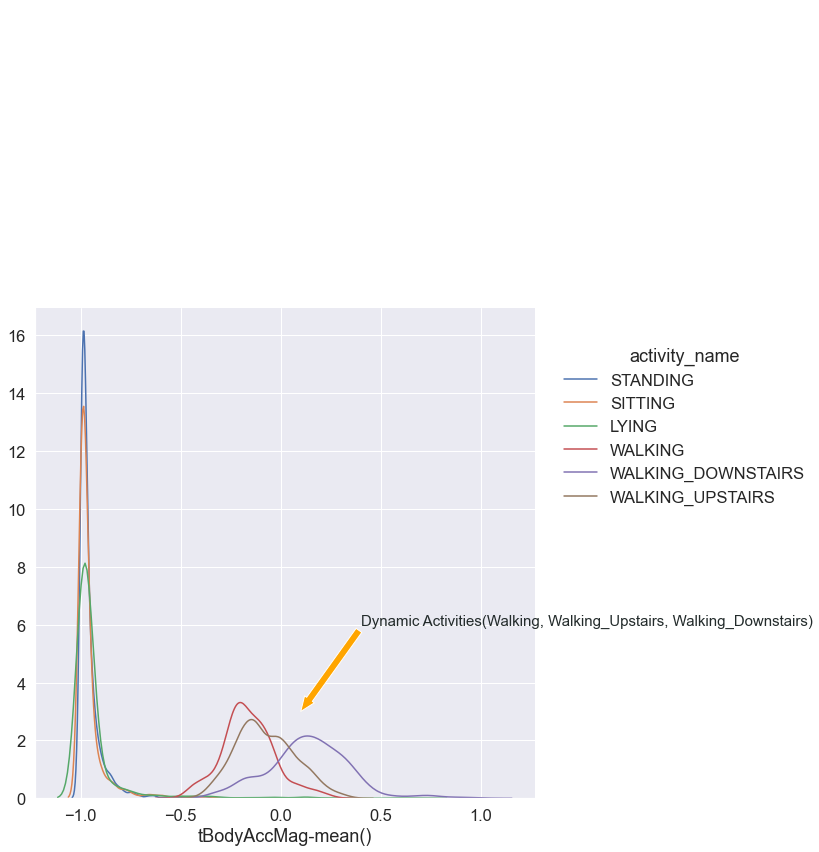

In [38]:
# understanding tBodyAccMag-mean()
facetgrid = sns.FacetGrid(data = train_df, hue = "activity_name", size = 8)
facetgrid.map(sns.distplot,"tBodyAccMag-mean()", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")
plt.show()

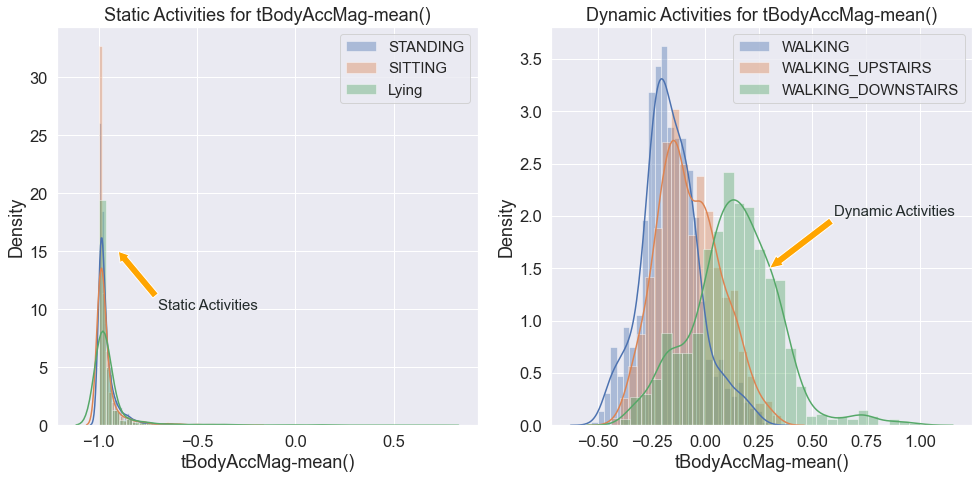

In [39]:
#let's plot "tBodyAccMagmean" for both static and dynamic activites separately to analysis them in more detail
df_standing = train_df[train_df["activity_name"] == "STANDING"]
df_sitting = train_df[train_df["activity_name"] == "SITTING"]
df_lying = train_df[train_df["activity_name"] == "LYING"]
df_walking = train_df[train_df["activity_name"] == "WALKING"]
df_walking_upstairs = train_df[train_df["activity_name"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["activity_name"] == "WALKING_DOWNSTAIRS"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))
#STASTIC ACTIVITY
axes[0].set_title("Static Activities for tBodyAccMag-mean()")
sns.distplot(df_standing["tBodyAccMag-mean()"], hist = True, label = "STANDING", ax = axes[0])
sns.distplot(df_sitting["tBodyAccMag-mean()"], hist = True, label = "SITTING", ax = axes[0])
sns.distplot(df_lying["tBodyAccMag-mean()"], hist = True, label = "Lying", ax = axes[0])
axes[0].legend(fontsize = 15)
axes[0].annotate('Static Activities', xy=(-0.90, 15), xytext=(-0.7,10),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 10), size = 15, color = "#232b2b")
# DYNAMMIC ACTIVITY
axes[1].set_title("Dynamic Activities for tBodyAccMag-mean()")
sns.distplot(df_walking["tBodyAccMag-mean()"],hist=True, label = "WALKING", ax = axes[1])
sns.distplot(df_walking_upstairs["tBodyAccMag-mean()"],hist=True, label = "WALKING_UPSTAIRS", ax = axes[1])
sns.distplot(df_walking_downstairs["tBodyAccMag-mean()"], hist = True, label = "WALKING_DOWNSTAIRS", ax = axes[1])
axes[1].legend(fontsize = 15)
axes[1].annotate('Dynamic Activities', xy=(0.3, 1.5), xytext=(0.60,2),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")

plt.tight_layout()
plt.show()

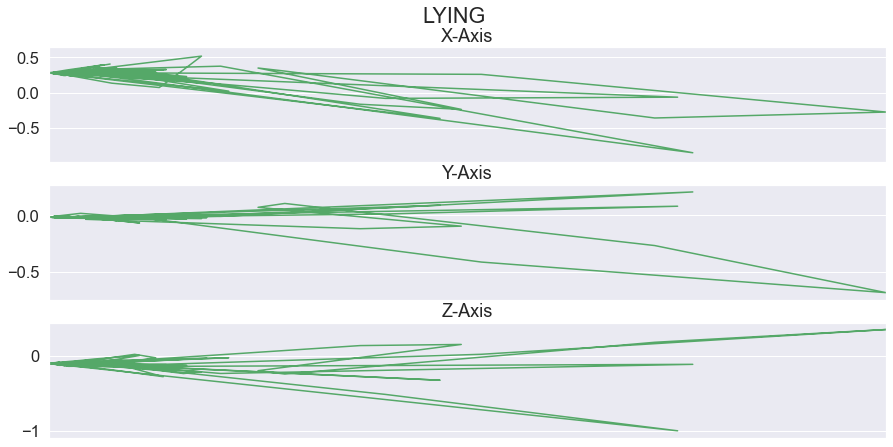

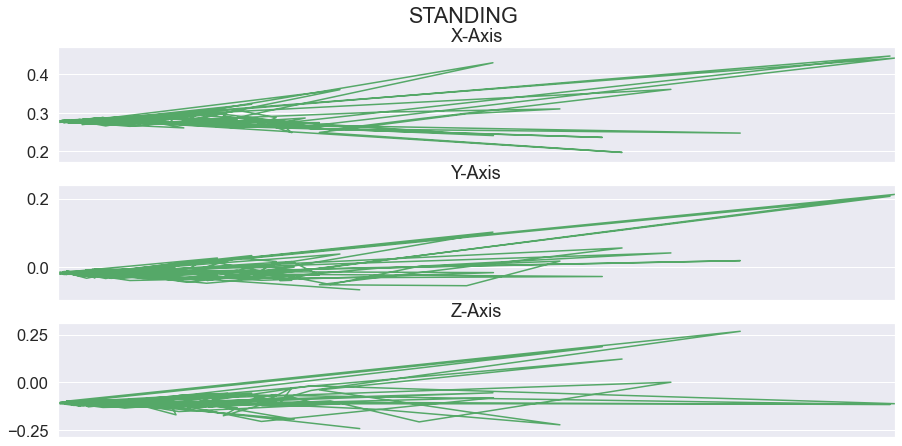

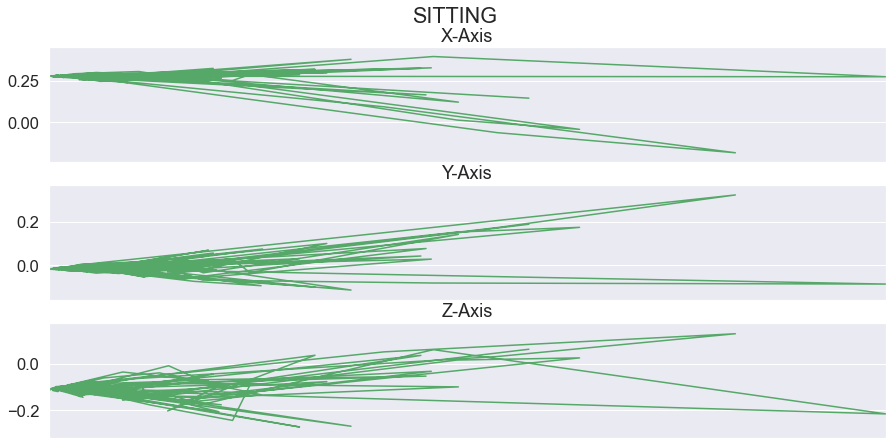

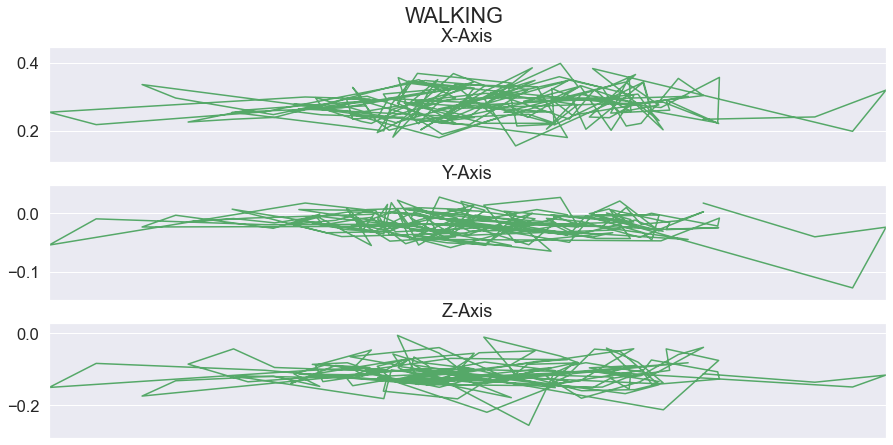

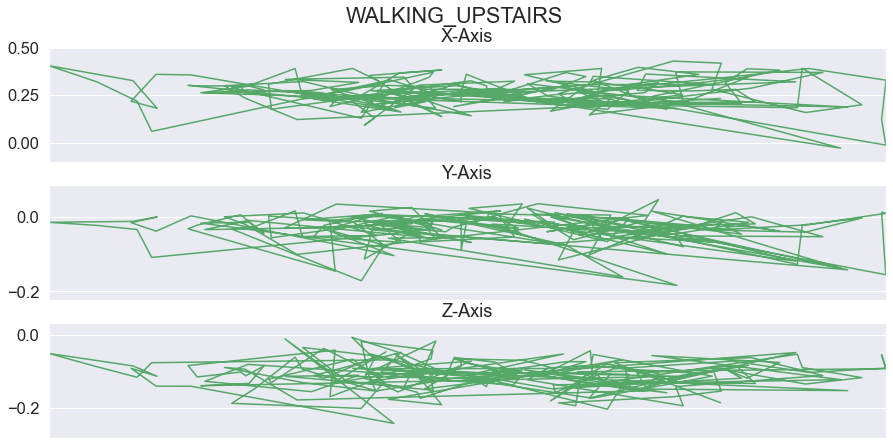

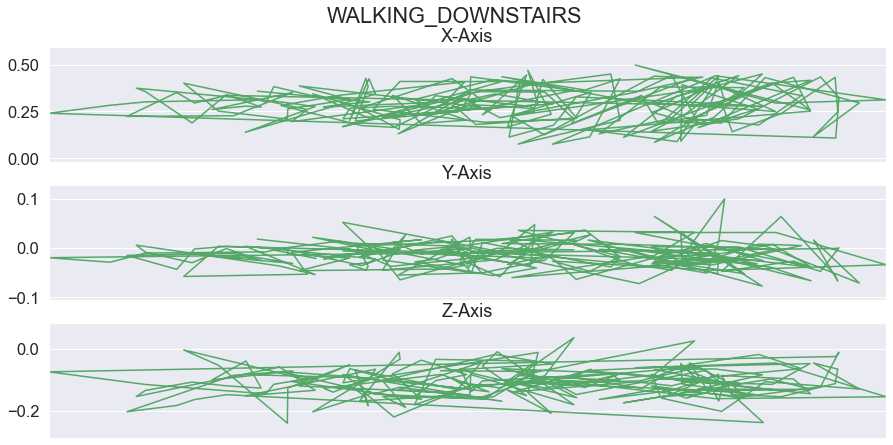

In [40]:
Fs=20
activities =train_df['activity_name'].value_counts().index
activities

def plot_activity(activity, train_df):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, train_df['tBodyAccMag-sma()'], train_df['tBodyAcc-mean()-X'], 'X-Axis')
    plot_axis(ax1, train_df['tBodyAccMag-sma()'], train_df['tBodyAcc-mean()-Y'], 'Y-Axis')
    plot_axis(ax2, train_df['tBodyAccMag-sma()'], train_df['tBodyAcc-mean()-Z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity_name)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity_name in activities:
    data_for_plot = train_df[(train_df['activity_name'] == activity_name)][:Fs*10]
    plot_activity(activity_name, data_for_plot)

In [41]:
# top (+) and (-) features
x=train_df['tBodyGyroJerk-correlation()-XY']
y=train_df['tGravityAcc-entropy()-X']
# output to static HTML file
output_notebook()

p = figure(plot_width=400, plot_height=400)
p.circle(x,y,size=10, color="navy", alpha=0.2)
show(p)

Loading BokehJS ...

In [42]:
x=train_df['tBodyGyro-correlation()-YZ']
y=train_df['tBodyAccJerk-correlation()-XY']

bins = hexbin(x, y, 0.1)
p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
p.grid.visible = False
p.hex_tile(q="q", r="r", size=1.06, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))
output_notebook()
show(p)

Loading BokehJS ...

In [43]:
# contingency table of observed counts
print('\ncontingency table of observed counts')
ct1=pd.crosstab(train_df['tBodyGyroJerk-correlation()-XY'], train_df['tGravityAcc-entropy()-X'])
print (ct1)

# column percentages
print('\ncolumn percentages')
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print('\nchi-square')
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)


contingency table of observed counts
tGravityAcc-entropy()-X         -1.000000  -0.979400  -0.963711  -0.949894  \
tBodyGyroJerk-correlation()-XY                                               
-0.895269                               0          0          0          0   
-0.864228                               0          0          0          0   
-0.859497                               0          0          0          0   
-0.843749                               1          0          0          0   
-0.828483                               1          0          0          0   
...                                   ...        ...        ...        ...   
 0.856028                               0          0          0          0   
 0.856308                               0          0          0          0   
 0.863211                               1          0          0          0   
 0.903738                               0          0          0          0   
 1.000000                 

(23276658.769230817, 0.3638060307756044, 23274283, array([[4.24e-01, 1.63e-03, 1.09e-03, ..., 1.36e-04, 1.36e-04, 1.36e-04],
       [4.24e-01, 1.63e-03, 1.09e-03, ..., 1.36e-04, 1.36e-04, 1.36e-04],
       [4.24e-01, 1.63e-03, 1.09e-03, ..., 1.36e-04, 1.36e-04, 1.36e-04],
       ...,
       [4.24e-01, 1.63e-03, 1.09e-03, ..., 1.36e-04, 1.36e-04, 1.36e-04],
       [4.24e-01, 1.63e-03, 1.09e-03, ..., 1.36e-04, 1.36e-04, 1.36e-04],
       [4.24e-01, 1.63e-03, 1.09e-03, ..., 1.36e-04, 1.36e-04, 1.36e-04]]))


In [44]:
# contingency table of observed counts
print('\ncontingency table of observed counts')
ct1=pd.crosstab(train_df['tBodyGyro-correlation()-YZ'], train_df['tBodyAccJerk-correlation()-XY'])
print (ct1)

# column percentages
print('\ncolumn percentages')
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print('\nchi-square')
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)


contingency table of observed counts
tBodyAccJerk-correlation()-XY  -1.000000  -0.986457  -0.979055  -0.933986  \
tBodyGyro-correlation()-YZ                                                  
-1.000000                              0          0          0          0   
-0.999977                              0          0          0          0   
-0.997599                              0          0          0          0   
-0.997079                              0          0          0          0   
-0.996259                              0          0          0          0   
...                                  ...        ...        ...        ...   
 0.978494                              0          0          0          0   
 0.986067                              0          0          0          0   
 0.996186                              0          0          0          0   
 0.997098                              0          0          0          0   
 1.000000                             

(54029850.00000413, 0.23974009699701143, 54022500, array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))


### PART-3 (ML)

In [45]:
x_train = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_train = train_df["activity"]

In [15]:
x_test = test_df.drop(["subject_id","activity","activity_name"], axis = 1)
y_test = test_df["activity"]

In [16]:
print(train_df.shape)
print(train_df1.shape)

print(test_df.shape)
print(test_df1.shape)

(7351, 564)
(7351, 1)
(2946, 564)
(2946, 1)


In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7351, 561), (7351,), (2946, 561), (2946,))

#### Meta-learning (Stacking ensemble)

In [20]:
table = pd.DataFrame(columns = ["Model", "Accuracy(%)"])
def evaluating_model(model_name, accuracy):
    global table
    table = table.append(pd.DataFrame([[model_name, accuracy]], columns = ["Model", "Accuracy(%)"]))
    table.reset_index(drop = True, inplace = True)

def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "tab20b", annot =True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.xlabel('Predicted Class', fontsize = 10)
    plt.ylabel('Original Class', fontsize = 10)
    plt.tick_params(labelsize = 10)
    plt.xticks(rotation = 90)
    plt.show()

def apply_model(cross_val, x_train, y_train, x_test, y_test, model_name):
    start = datetime.now()
    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)
    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now() - start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    print('Accuracy')
    print(str(accuracy)+"%\n")
    
    print(' Best Estimator')
    print("{}\n".format(cross_val.best_estimator_))
    
    print(' Best Hyper-Parameters')
    print(cross_val.best_params_)
    evaluating_model(model_name, accuracy)
    print_confusionMatrix(y_test, predicted_points)

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:55.957824

Accuracy
96.3%

 Best Estimator
LogisticRegression(C=100, multi_class='ovr')

 Best Hyper-Parameters
{'C': 100, 'penalty': 'l2'}


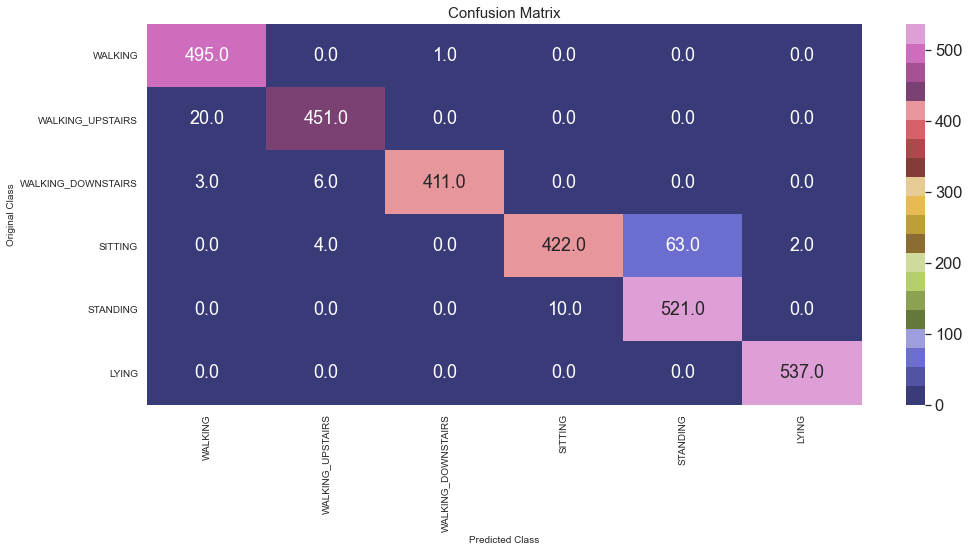

In [21]:
# logistic regression
from sklearn.linear_model import LogisticRegression
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3], "penalty": ["l1", "l2"]}
clf = LogisticRegression(multi_class = "ovr")
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Logistic Regression")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:47.369284

Accuracy
96.61%

 Best Estimator
LinearSVC(C=1)

 Best Hyper-Parameters
{'C': 1}


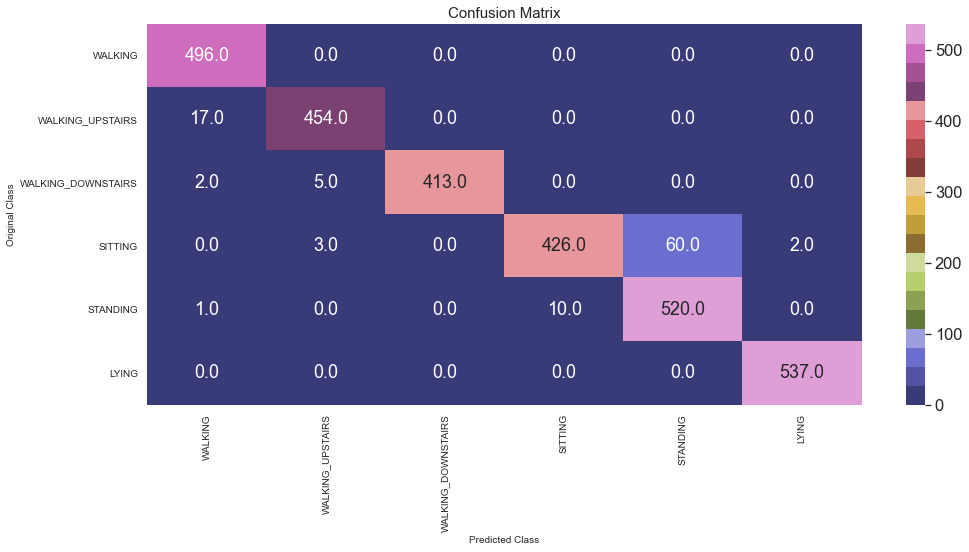

In [22]:
# linear SVM
from sklearn.svm import LinearSVC
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
clf = LinearSVC()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Linear SVM")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:04:19.902850

Accuracy
96.54%

 Best Estimator
SVC(C=100)

 Best Hyper-Parameters
{'C': 100}


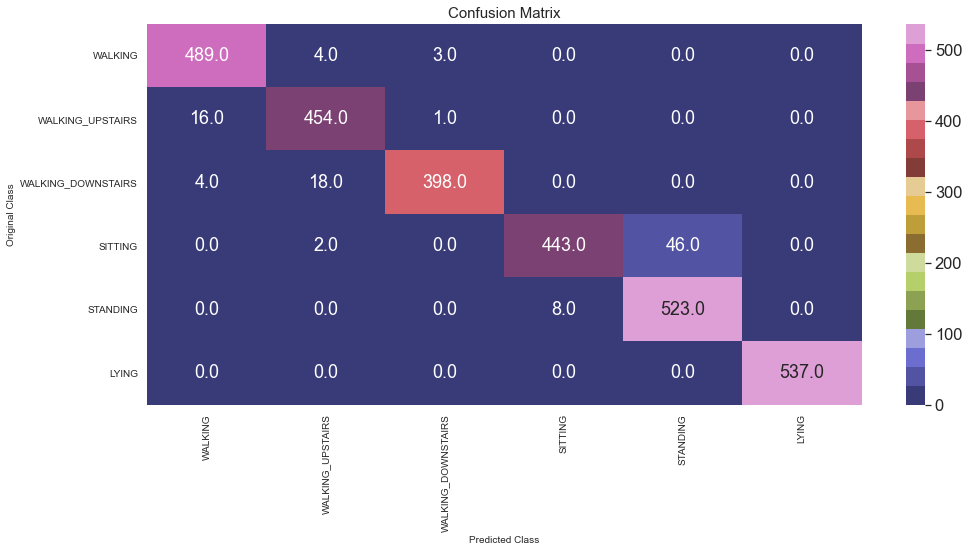

In [23]:
#RBF SVM
from sklearn.svm import SVC
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
clf = SVC()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "RBF SVM")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:24.425659

Accuracy
85.54%

 Best Estimator
DecisionTreeClassifier(max_depth=6)

 Best Hyper-Parameters
{'max_depth': 6}


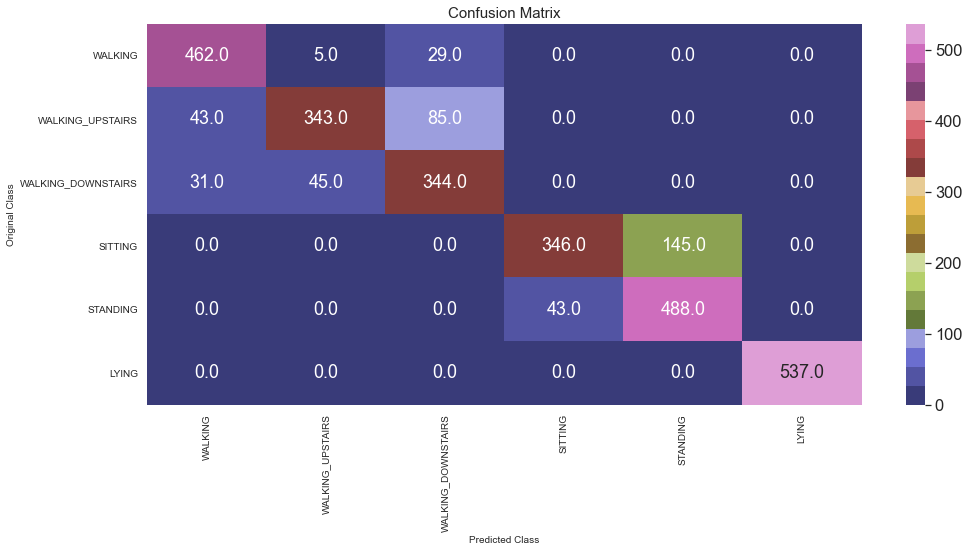

In [24]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
parameters = {"max_depth": [2, 3, 4, 5, 6, 7, 8]}
clf = DecisionTreeClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Decision Trees")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:05:32.347216

Accuracy
92.67%

 Best Estimator
RandomForestClassifier(n_estimators=400)

 Best Hyper-Parameters
{'n_estimators': 400}


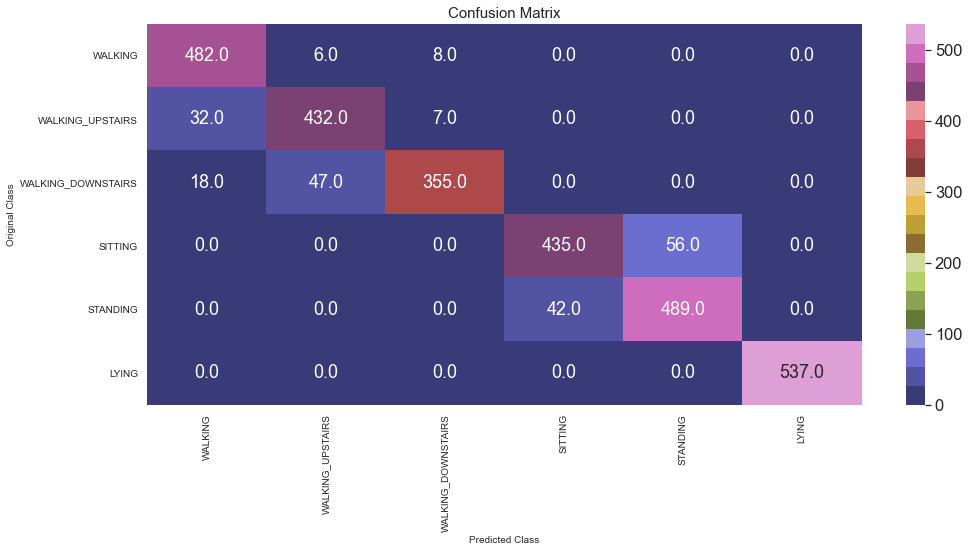

In [26]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
parameters = {"n_estimators": [50, 100, 200, 400, 800]}
clf = RandomForestClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Random Forest")

#### Model Comparision

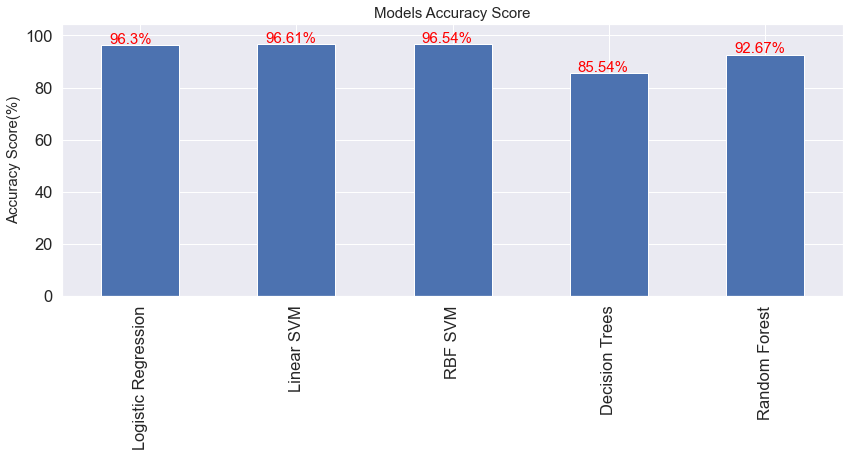

,Model,Accuracy(%)
0,Logistic Regression,96.30
1,Linear SVM,96.61
2,RBF SVM,96.54
3,Decision Trees,85.54
4,Random Forest,92.67


In [29]:
ax = table.plot(x = "Model", y = "Accuracy(%)", kind = "bar", figsize = (14, 5), legend = False)
plt.title("Models Accuracy Score", fontsize = 15)
plt.xlabel("")
plt.margins(x = 0, y = 0.08)
plt.ylabel("Accuracy Score(%)", fontsize = 15)
#plt.grid(visible = True)
for i in ax.patches:
    ax.text(x = i.get_x()+0.05, y = i.get_height()+0.5, s = str(i.get_height())+"%", fontsize = 15, color = "red")
plt.show()
table

### PART-4 (Deep learning)

#### Reading Data

In [30]:
all_signals_list = ["body_acc_x_", "body_acc_y_", "body_acc_z_", "body_gyro_x_", "body_gyro_y_", "body_gyro_z_", 
                   "total_acc_x_", "total_acc_y_", "total_acc_z_"]
def reading_data(filename):
    return pd.read_csv(filename, delim_whitespace = True, header = None)
def total_signal_matrix(trainOrTest):
    complete_data = []
    for signal in all_signals_list:
        complete_data.append(reading_data(trainOrTest +"/Inertial Signals/"+ signal + trainOrTest +".txt"))
    return np.transpose(complete_data, (1, 2, 0))
def load_labels(subset):
    filename = subset+"/y_"+subset+".txt"
    y = reading_data(filename)
    return pd.get_dummies(y[0])
# here, get_dummies takes pandas series as input and returns its one-hot encoded vector of each element in a series.

def load_full_data():
    x_train = total_signal_matrix("train")
    y_train = load_labels("train")
    x_test = total_signal_matrix("test")
    y_test = load_labels("test")
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_full_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 128, 9), (7352, 6), (2947, 128, 9), (2947, 6))

#### Hyper-parameter tunning

In [31]:
#saving data for loading it later in hyperas for hyper-parameter tuning
np.save("train", x_train)
np.save("train_label", y_train)
np.save("test", x_test)
np.save("test_label", y_test)

def data():
    x_train = np.load("train.npy")
    y_train = np.load("train_label.npy")
    x_test = np.load("test.npy")
    y_test = np.load("test_label.npy")
    return x_train, y_train, x_test, y_test

#this function will return number of classes
def count_unique_classes(y_train):
    return len(set([tuple(a) for a in y_train]))

In [33]:
def create_model(x_train, y_train, x_test, y_test):
    
    epochs = 8
    batch_size = 32
    timesteps = x_train.shape[1]
    input_dim = len(x_train[0][0])
    n_classes = 6
    
    model = Sequential()
    
    model.add(LSTM(64, return_sequences = True, input_shape = (timesteps, input_dim)))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(LSTM({{choice([32, 16])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(n_classes, activation='sigmoid'))
    
    print(model.summary())
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
    
    result = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=2, validation_split=0.01)
    
    validation_acc = np.amax(result.history['val_acc']) 
    
    print('Best validation acc of epoch:', validation_acc)
    
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

In [34]:
best_run, best_model = optim.minimize(model=create_model, data=data, algo=tpe.suggest, max_evals=4, trials=Trials(), notebook_name = "trial")
x_train, y_train, x_test, y_test = data()

score = best_model.evaluate(x_test, y_test)

print('---------------------')
print('|      Accuracy      |')
print('---------------------')
acc = np.round((score[1]*100), 2)
print(str(acc)+"%\n")
    
print('----------------------------------')
print('|      Best Hyper-Parameters      |')
print('----------------------------------')
print(best_run)
print("\n\n")

true_labels = [np.argmax(i)+1 for i in y_test]
predicted_probs = best_model.predict(x_test)
predicted_labels = [np.argmax(i)+1 for i in predicted_probs]
print_confusionMatrix(true_labels, predicted_labels)

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import seaborn as sns
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import warnings
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from sklearn.manifold import TSNE
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import LSTM
except:
    pass

try:
    from keras.layers.core import Dense, Dropout
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from sklearn.linear_model import LogisticRegression
except:
    pass

try:
    from datetime import datetime
except:
    pass

try:
    from sklearn.model_selection import GridSearchCV
exc

job exception: 'val_acc'



  0%|                                                                            | 0/4 [02:22<?, ?trial/s, best loss=?]


KeyError: 'val_acc'

#### loss function

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

#plot_learningCurve(history, 7)

In [ ]:
import numpy as np
data = np.load('train_label.npy')
print(data)

In [ ]:
data1=np.load("test_label.npy")
print(data1)

In [ ]:
data2=np.load("test.npy")
print(data2)

end